In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
import seaborn as sns

In [2]:
df=pd.read_csv("dailyActivity_merged.csv")

In [3]:
print(df.shape)

(940, 15)


In [4]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [5]:
features = df.drop(['Id','ActivityDate'], axis=1)

In [6]:
features.describe()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [7]:
#Normalization and scaling
scaler = preprocessing.MinMaxScaler()
features_normal = scaler.fit_transform(features)

In [8]:
pd.DataFrame(features_normal).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,0.212052,0.195851,0.195339,0.021887,0.068553,0.087584,0.311935,0.014603,0.100785,0.094859,0.372225,0.688341,0.470124
std,0.141235,0.140014,0.139396,0.125431,0.121302,0.136355,0.190537,0.066783,0.156404,0.139772,0.210762,0.209213,0.146565
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.105215,0.093471,0.093471,0.000000,0.000000,0.000000,0.181606,0.000000,0.000000,0.000000,0.245174,0.506771,0.373163
50%,0.205600,0.187121,0.187121,0.000000,0.009580,0.037037,0.314192,0.000000,0.019048,0.041958,0.384170,0.734375,0.435510
75%,0.297815,0.275152,0.275062,0.000000,0.093636,0.123457,0.446545,0.000000,0.152381,0.132867,0.509653,0.853819,0.570051
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
inertia = []
K = range(1,10)
for k in K:
    kmm = KMeans(n_clusters=k).fit(features_normal)
    kmm.fit(features_normal)
    inertia.append(kmm.inertia_)

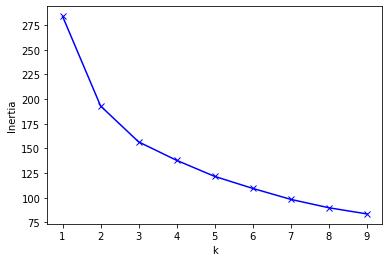

In [10]:
# Plot the elbow
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [11]:
#From the elbow, technique k=4 is the pivot point we are looking at.
#Fit K-means model with k=4 clusters.

kmeans = KMeans(n_clusters=8).fit(features_normal)

In [12]:
labels = pd.DataFrame(kmeans.labels_)

In [13]:
labeledData = pd.concat((features, labels), axis=1)
labeledData.head()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,0
0,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,0
1,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,1
2,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,6
3,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1
4,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,1


In [14]:
labeledData = labeledData.rename({0:'cluster'},axis=1)

In [15]:
labeledData.head()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,cluster
0,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,0
1,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,1
2,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,6
3,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1
4,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,1


In [16]:
labels

,0
0,0
1,1
2,6
3,1
4,1
...,...
935,0
936,3
937,0
938,3


In [17]:
cluster_centers =  kmeans.cluster_centers_

In [18]:
SSE = kmeans.inertia_

In [19]:
SSE

89.53431192434704

In [20]:
cluster_centers

array([[ 2.52235037e-01,  2.28044276e-01,  2.28044276e-01,
        -2.08166817e-17,  2.33683166e-02,  5.50072068e-02,
         5.15031730e-01,  2.39963079e-02,  3.72250423e-02,
         5.69379859e-02,  6.23111146e-01,  6.02192611e-01,
         4.90128457e-01],
       [ 3.19671562e-01,  2.87484747e-01,  2.87484747e-01,
        -1.73472348e-17,  1.25090179e-01,  1.73341946e-01,
         3.86348336e-01,  5.81395349e-03,  2.13205980e-01,
         1.96454708e-01,  4.21275927e-01,  5.90592700e-01,
         5.37052682e-01],
       [ 3.03822946e-02,  2.77247293e-02,  2.77247293e-02,
        -1.38777878e-17,  4.26983437e-03,  8.05898492e-03,
         3.30764112e-02,  4.75341644e-03,  1.22315593e-02,
         1.17464235e-02,  4.88808136e-02,  9.61297204e-01,
         3.74337735e-01],
       [ 5.09177934e-01,  5.31173728e-01,  5.31173728e-01,
        -1.04083409e-17,  4.69060219e-01,  1.10246914e-01,
         3.61624646e-01,  2.54545457e-02,  5.13333333e-01,
         1.33566434e-01,  3.63166023e

In [21]:
cluster_centers[0]

array([ 2.52235037e-01,  2.28044276e-01,  2.28044276e-01, -2.08166817e-17,
        2.33683166e-02,  5.50072068e-02,  5.15031730e-01,  2.39963079e-02,
        3.72250423e-02,  5.69379859e-02,  6.23111146e-01,  6.02192611e-01,
        4.90128457e-01])

In [22]:
(features_normal == cluster_centers[0]).all(1).any()

False

In [23]:
cluster_centers = scaler.inverse_transform(cluster_centers)

In [24]:
cluster_centers

array([[ 9.08525381e+03,  6.39208122e+00,  6.39208122e+00,
        -1.02878997e-16,  5.12233501e-01,  3.56446701e-01,
         5.51598985e+00,  2.63959385e-03,  7.81725888e+00,
         8.14213198e+00,  3.22771574e+02,  8.67157360e+02,
         2.40162944e+03],
       [ 1.15142500e+04,  8.05819767e+00,  8.05819767e+00,
        -8.57324977e-17,  2.74197674e+00,  1.12325581e+00,
         4.13779070e+00,  6.39534880e-04,  4.47732558e+01,
         2.80930233e+01,  2.18220930e+02,  8.50453488e+02,
         2.63155814e+03],
       [ 1.09433987e+03,  7.77124181e-01,  7.77124181e-01,
        -6.85859981e-17,  9.35947698e-02,  5.22222224e-02,
         3.54248365e-01,  5.22875805e-04,  2.56862745e+00,
         1.67973856e+00,  2.53202614e+01,  1.38426797e+03,
         1.83425490e+03],
       [ 1.83400800e+04,  1.48888000e+01,  1.48888000e+01,
        -5.14394986e-17,  1.02818000e+01,  7.14400002e-01,
         3.87299998e+00,  2.80000001e-03,  1.07800000e+02,
         1.91000000e+01,  1.88120000e

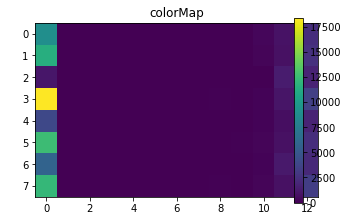

In [25]:
fig = plt.figure(figsize=(6, 3.2))

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(cluster_centers)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

In [26]:
feature_list = features.columns

In [27]:
feature_list

Index(['TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [28]:
cluster_df = pd.DataFrame(cluster_centers,columns=feature_list)

In [29]:
cluster_df

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,9085.253807,6.392081,6.392081,-1.028790e-16,0.512234,0.356447,5.515990,0.002640,7.817259,8.142132,322.771574,867.157360,2401.629442
1,11514.250000,8.058198,8.058198,-8.573250e-17,2.741977,1.123256,4.137791,0.000640,44.773256,28.093023,218.220930,850.453488,2631.558140
2,1094.339869,0.777124,0.777124,-6.858600e-17,0.093595,0.052222,0.354248,0.000523,2.568627,1.679739,25.320261,1384.267974,1834.254902
3,18340.080000,14.888800,14.888800,-5.143950e-17,10.281800,0.714400,3.873000,0.002800,107.800000,19.100000,188.120000,1004.400000,3500.960000
4,3996.783582,2.734627,2.734627,-1.714650e-17,0.288358,0.122313,2.320075,0.000522,4.179104,3.402985,156.350746,673.537313,1801.723881
5,12579.970588,9.027941,9.027941,0.000000e+00,1.168529,3.795882,4.048824,0.000588,14.323529,84.441176,215.470588,857.000000,2423.176471
6,5818.905325,4.088166,4.088166,1.159524e-02,0.723846,0.319231,2.936331,0.002012,9.396450,7.307692,185.355030,1223.000000,2112.189349
7,12202.225806,9.272258,8.837097,3.216809e+00,3.576774,0.869677,4.818710,0.007419,72.129032,17.451613,233.612903,856.064516,3328.258065


In [37]:
#drop cloumns that are not relevant.
cluster_df = cluster_df.drop(columns=['TrackerDistance', 'LoggedActivitiesDistance'])

In [38]:
sorted_clusters = cluster_df.sort_values(by=['TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 'ModeratelyActiveDistance','VeryActiveDistance', 'LightActiveDistance','FairlyActiveMinutes' ,'LightlyActiveMinutes', 'Calories'])


In [39]:
sorted_clusters

,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
2,1094.339869,0.777124,0.093595,0.052222,0.354248,0.000523,2.568627,1.679739,25.320261,1384.267974,1834.254902
4,3996.783582,2.734627,0.288358,0.122313,2.320075,0.000522,4.179104,3.402985,156.350746,673.537313,1801.723881
6,5818.905325,4.088166,0.723846,0.319231,2.936331,0.002012,9.396450,7.307692,185.355030,1223.000000,2112.189349
0,9085.253807,6.392081,0.512234,0.356447,5.515990,0.002640,7.817259,8.142132,322.771574,867.157360,2401.629442
1,11514.250000,8.058198,2.741977,1.123256,4.137791,0.000640,44.773256,28.093023,218.220930,850.453488,2631.558140
7,12202.225806,9.272258,3.576774,0.869677,4.818710,0.007419,72.129032,17.451613,233.612903,856.064516,3328.258065
5,12579.970588,9.027941,1.168529,3.795882,4.048824,0.000588,14.323529,84.441176,215.470588,857.000000,2423.176471
3,18340.080000,14.888800,10.281800,0.714400,3.873000,0.002800,107.800000,19.100000,188.120000,1004.400000,3500.960000
